Car Price Prediction Dataset 

Introduction

This comprehensive automotive dataset contains detailed information about 205 different car models from various manufacturers, providing a rich source for analyzing factors that influence vehicle pricing in the automotive market
The dataset is designed for machine learning regression tasks, specifically for predicting car prices based on technical specifications, engine characteristics, body features, and brand information. It serves as an excellent resource for:
Price prediction modeling,Feature importance analysis,Market segmentation studies,Automotive industry analytics
Predictive Modeling: Build ML models to estimate car prices

Business Intelligence: Understand pricing factors in auto industry

Consumer Analysis: Identify value propositions in car market

Feature Engineering: Explore relationships between car specs and prices
This dataset bridges the gap between technical automotive specifications and market economics, making it perfect for both data science practitioners and automotive enthusiasts interested in understanding what truly drives car prices in the competitive automotive landscape
Car specifications: engine size, horsepower, dimensions, weight

Technical specs: fuel type, aspiration, cylinder count, MPG

Body & design: car body type, doors, drive wheel, engine location

Brand diversity: Multiple manufacturers (Audi, BMW, Toyota, Honda, etc.)

Basic exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Load data
df = pd.read_csv(r"E:\Data_science\dataset\machine project data\CarPrice_Assignment.csv")


print( df.shape)

print(df.isnull().sum())

print(df.dtypes)

print(df.describe())

(205, 26)
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype   

 Label encoding for categorical variables

In [3]:
# Extract brand from CarName
df['brand'] = df['CarName'].apply(lambda x: x.split()[0].lower())

# Handle categorical variables
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 
                   'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand']

# Label encoding for categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Feature selection
features = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 
           'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'carheight',
           'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 
           'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 
           'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'brand']

X = df[features]
y = df['price']



Split the data

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 data visualization 

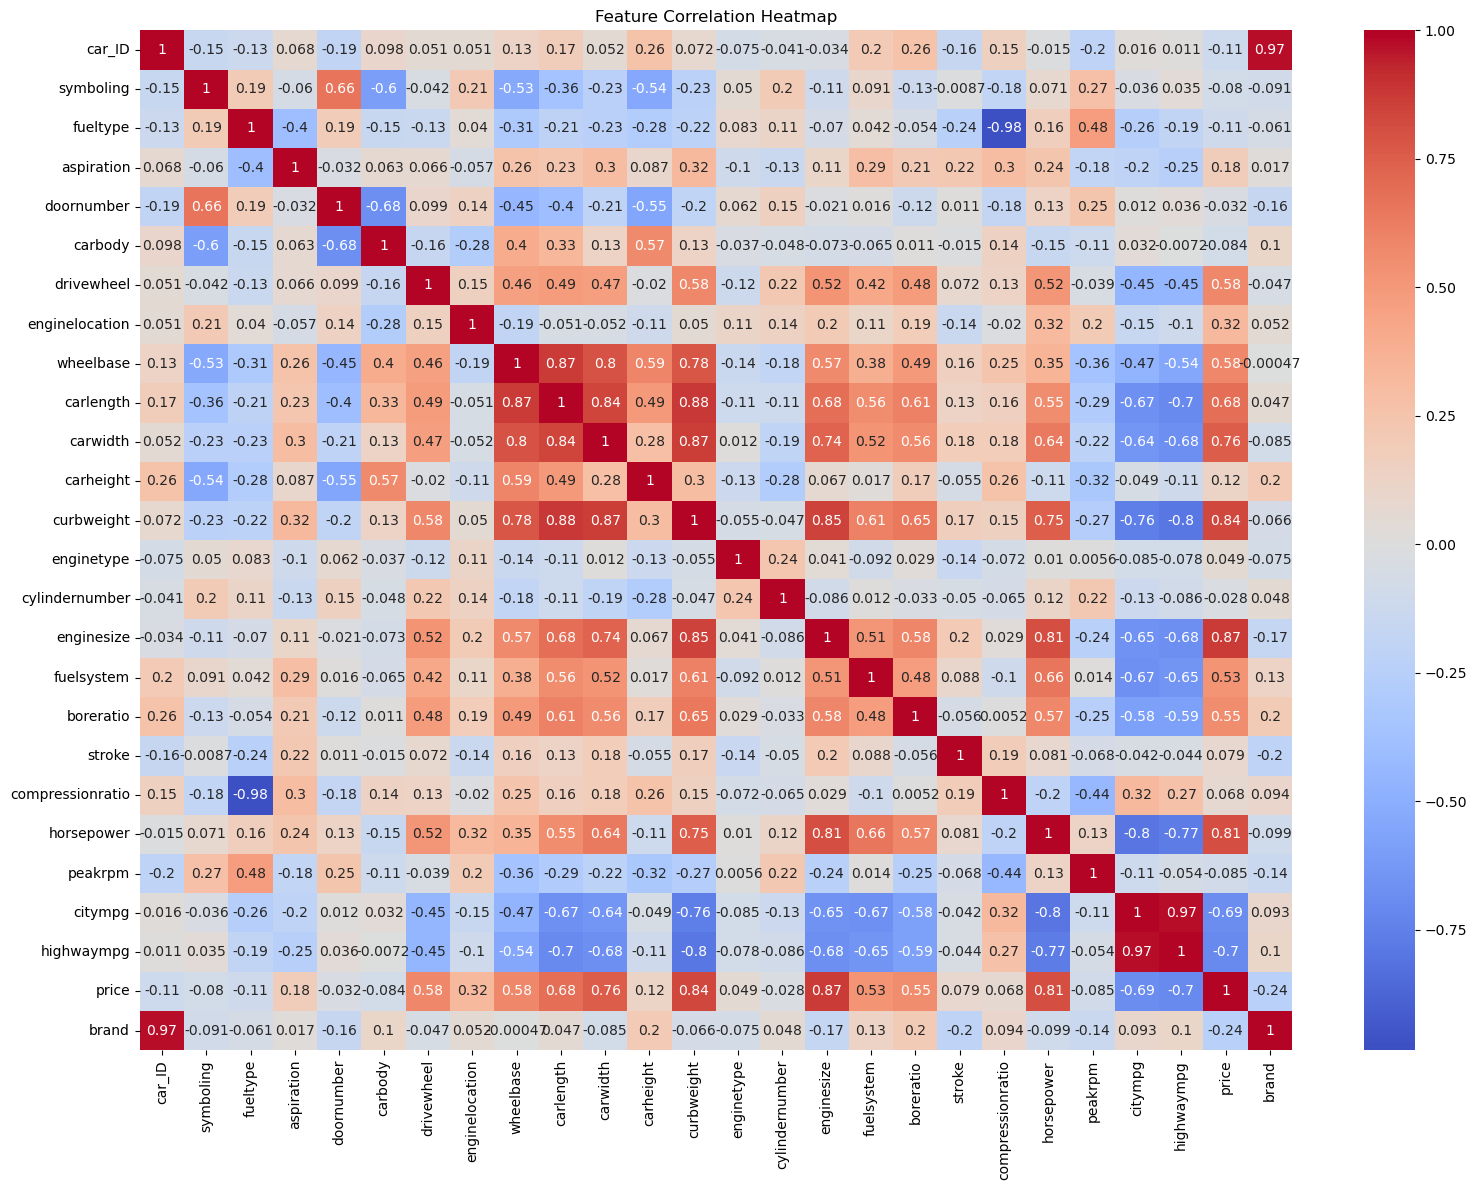

In [5]:

plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()



Model Training & Comparison

In [6]:

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf')
}

results = {}

for name, model in models.items():
    if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'SVR']:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df.round(4))

Model Performance Comparison:
                         MAE           MSE       RMSE      R2
Linear Regression  2279.3730  1.261339e+07  3551.5333  0.8402
Ridge Regression   2225.1316  1.221915e+07  3495.5894  0.8452
Lasso Regression   2272.8867  1.254955e+07  3542.5343  0.8410
Random Forest      1314.2586  3.472056e+06  1863.3455  0.9560
Gradient Boosting  1611.0526  5.338934e+06  2310.6133  0.9324
SVR                5696.1897  8.684646e+07  9319.1450 -0.1001


 Best Model Selection & Hyperparameter Tuning

In [7]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

y_pred_best = best_rf.predict(X_test)

final_mae = mean_absolute_error(y_test, y_pred_best)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
final_r2 = r2_score(y_test, y_pred_best)

print(f"\nFinal Model Performance:")
print(f"MAE: ${final_mae:,.2f}")
print(f"RMSE: ${final_rmse:,.2f}")
print(f"R² Score: {final_r2:.4f}")

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.8971

Final Model Performance:
MAE: $1,318.22
RMSE: $1,848.17
R² Score: 0.9567


 Feature Importance Analysis

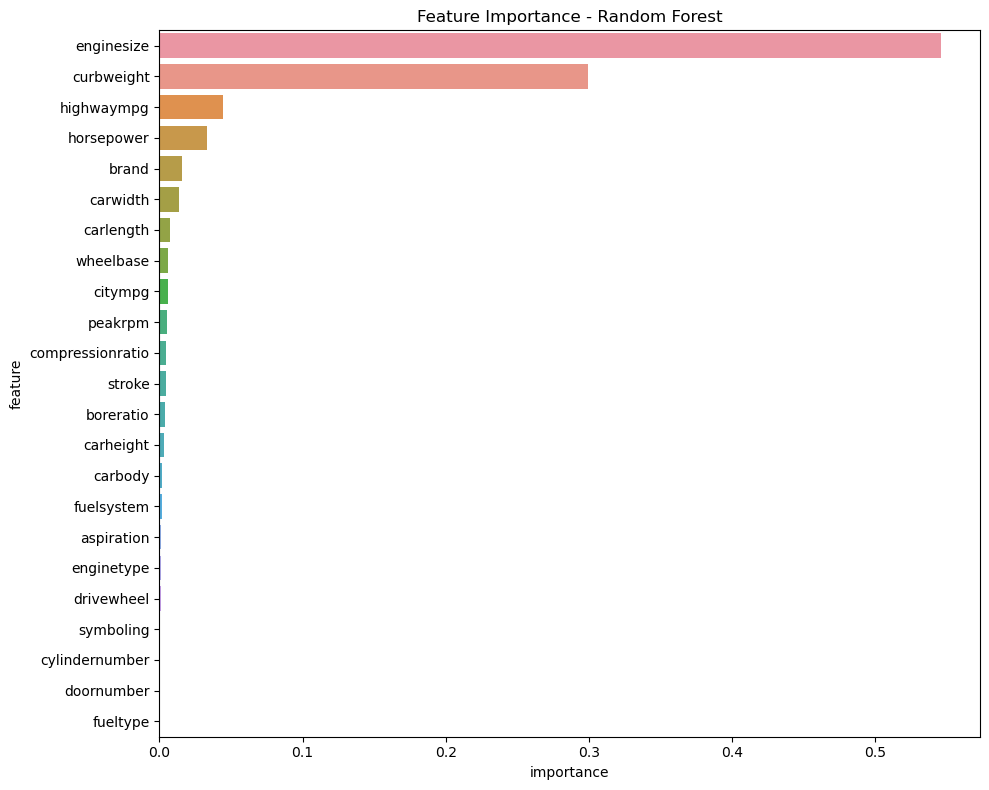

Top 10 Most Important Features:
       feature  importance
13  enginesize    0.545718
10  curbweight    0.299148
21  highwaympg    0.044277
18  horsepower    0.032920
22       brand    0.015591
8     carwidth    0.013737
7    carlength    0.007118
6    wheelbase    0.006304
20     citympg    0.005805
19     peakrpm    0.005417


In [8]:

feature_importance = pd.DataFrame({
    'feature': features,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

Prediction Visualization

In [ ]:
# Actual vs Predicted prices
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_best
plt.scatter(y_pred_best, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

In [ ]:
def predict_car_price(features_dict, model=best_rf, scaler=scaler, label_encoders=label_encoders):
    """
    Predict car price based on input features
    """
    # Create feature array in correct order
    feature_array = []
    for feature in features:
        if feature in categorical_cols:
            # Transform categorical feature
            transformed = label_encoders[feature].transform([features_dict[feature]])[0]
            feature_array.append(transformed)
        else:
            feature_array.append(features_dict[feature])
    
    # Make prediction
    prediction = model.predict([feature_array])[0]
    
    return prediction

# Example usage:
example_car = {
    'symboling': 1,
    'fueltype': 'gas',
    'aspiration': 'std',
    'doornumber': 'four',
    'carbody': 'sedan',
    'drivewheel': 'fwd',
    'wheelbase': 100.0,
    'carlength': 175.0,
    'carwidth': 65.0,
    'carheight': 55.0,
    'curbweight': 2500,
    'enginetype': 'ohc',
    'cylindernumber': 'four',
    'enginesize': 120,
    'fuelsystem': 'mpfi',
    'boreratio': 3.5,
    'stroke': 3.0,
    'compressionratio': 9.0,
    'horsepower': 110,
    'peakrpm': 5500,
    'citympg': 25,
    'highwaympg': 32,
    'brand': 'toyota'
}

predicted_price = predict_car_price(example_car)
print(f"Predicted Car Price: ${predicted_price:,.2f}")

Predicted Car Price: $10,354.33


205 vehicles with 26 features for price prediction analysis. Contains technical specs, engine details, body types, and brand information to build ML models that predict car prices based on vehicle characteristics